CNN can be trained for single class of data as well, here we need to understand 2 aspects of it.

1. Simple way is : you take single class and randomly mix of many other classes label data and train in CNN
2. Auto encoder way: Train your single set of images (make sure dataset cover very high variance), then now in prediction time: pass images to autoencoder and check reconstruction error. If reconstruction error high: they say “my single class NOT found in this image”, if it’s in manageable range, then say “my single class FOUND”

### simple cnn way

In [1]:
import tensorflow as tf

In [2]:
import cv2

In [3]:
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import glob

In [5]:
#import cv2
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [37]:

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

# No GPU found


GPU found


In [8]:
'''
im = cv2.imread('./image_chips2/clipped_image_254.png')
#im2 = Image.open('./image_chips/clipped_image_1.tif.png')


print(im.shape)



cv2.imshow('image', im)
cv2.waitKey(0)
cv2.destroyAllWindows()




image_files = glob.glob('./image_chips2/*.png')
#print(image_files)'''

"\nim = cv2.imread('./image_chips2/clipped_image_254.png')\n#im2 = Image.open('./image_chips/clipped_image_1.tif.png')\n\n\nprint(im.shape)\n\n\n\ncv2.imshow('image', im)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n\n\n\n\nimage_files = glob.glob('./image_chips2/*.png')\n#print(image_files)"

In [7]:
vehicle_images = glob.glob('./vehicle_chips2/*/*.png')
len(vehicle_images)

3271

In [8]:
vehicle_labels = np.ones(shape = (3271, 1)).astype('uint8')
vehicle_labels.shape

(3271, 1)

In [9]:
tree_images = glob.glob('./tree_chips2/*/*.png')
len(tree_images)

1925

In [10]:
tree_labels = np.zeros(shape = (1925,1)).astype('uint8')
tree_labels.shape

(1925, 1)

In [11]:
vehicles = []
for i in vehicle_images:
    data = cv2.imread(i)
    vehicles.append(data)
vehicles = np.array(vehicles)

In [12]:
vehicles = vehicles/255.

In [13]:
trees = []
for t in tree_images:
    data = cv2.imread(t)
    trees.append(data)
    
trees = np.array(trees)

In [14]:
trees = trees/255.

In [15]:
images = np.append(vehicles, trees, axis = 0)
images.shape

(5196, 24, 24, 3)

In [16]:
labels = np.append(vehicle_labels, tree_labels, axis = 0)
labels.shape

(5196, 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.8, random_state=42)

In [18]:
X_train

array([[[[0.25098039, 0.45882353, 0.36078431],
         [0.25490196, 0.4627451 , 0.35294118],
         [0.2627451 , 0.46666667, 0.34901961],
         ...,
         [0.2745098 , 0.44705882, 0.39215686],
         [0.2627451 , 0.44705882, 0.38039216],
         [0.27843137, 0.46666667, 0.39607843]],

        [[0.25882353, 0.44705882, 0.36078431],
         [0.25882353, 0.44313725, 0.35294118],
         [0.2627451 , 0.44313725, 0.35294118],
         ...,
         [0.27058824, 0.44313725, 0.38431373],
         [0.2627451 , 0.44313725, 0.37647059],
         [0.27843137, 0.47058824, 0.39215686]],

        [[0.27058824, 0.43529412, 0.36470588],
         [0.26666667, 0.42745098, 0.36078431],
         [0.2627451 , 0.41568627, 0.35294118],
         ...,
         [0.26666667, 0.43921569, 0.37647059],
         [0.2627451 , 0.43921569, 0.37254902],
         [0.27843137, 0.47058824, 0.38823529]],

        ...,

        [[0.50980392, 0.55686275, 0.58431373],
         [0.50196078, 0.55686275, 0.59215686]

In [19]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=uint8)

In [20]:
X_train_t = tf.constant(X_train)

In [21]:
y_train_t = tf.constant(y_train)

In [22]:
X_test_t = tf.constant(X_test)

In [23]:
y_test_t = tf.constant(y_test)

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(24, 24, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(2))

In [25]:
#model.summary()

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [27]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [28]:
#model.summary()

In [ ]:
model.fit(X_train_t, y_train_t, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 2s 6ms/step - loss: 0.7084 - accuracy: 0.3917
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 8/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 9/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 10/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 11/

33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 84/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 85/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 86/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 87/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 88/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 89/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 90/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 91/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 92/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3782
Epoch 93/100


In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred

array([[-52.18572  , -13.565932 ],
       [-46.875416 , -12.392427 ],
       [-53.24081  , -13.94749  ],
       ...,
       [-39.282932 , -10.160452 ],
       [-19.6653   ,  -5.0640345],
       [-43.124863 , -11.271008 ]], dtype=float32)

In [64]:
guess = np.argmax(y_pred, axis = 1)
guess = guess.reshape((len(y_test)), 1)
guess

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [65]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=uint8)

In [66]:
results = confusion_matrix(y_test, guess)

In [67]:
results

array([[   0, 1532],
       [   0, 2625]], dtype=int64)

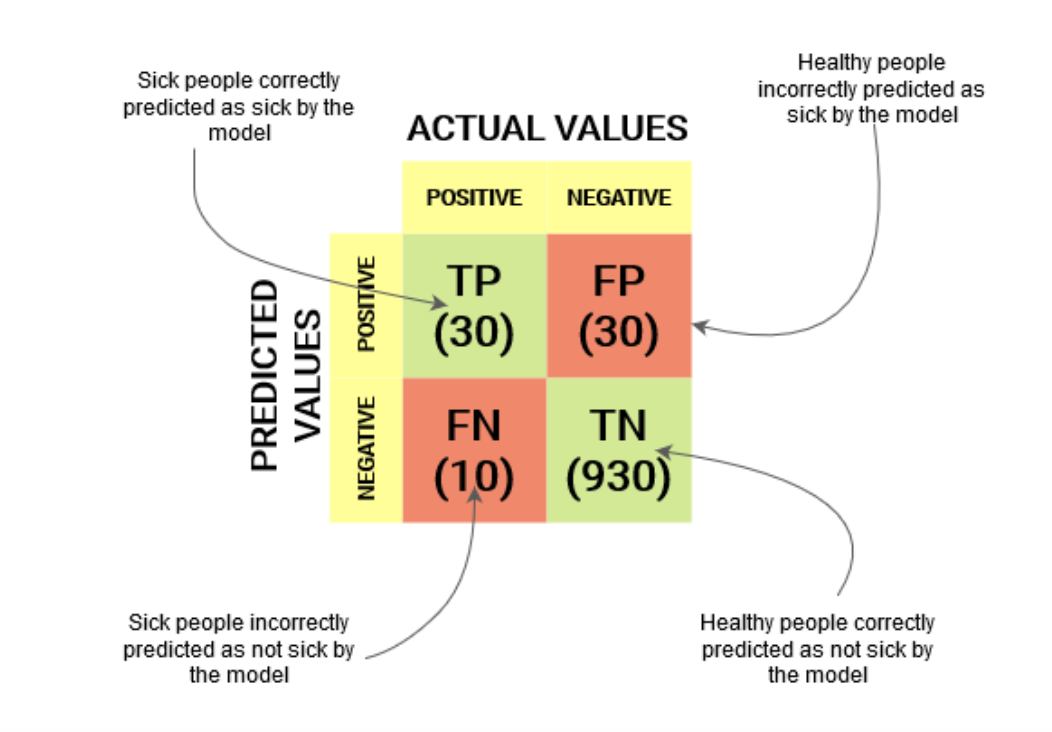

In [86]:
'''        
    
    
                            Actual Values
                            0     1
            
                        0  1530.  2. 
                
predicted values        1  7.     2618.  




'''


'        \n    \n    \n                            Actual Values\n                            0     1\n            \n                        0  1530.  2. \n                \npredicted values        1  7.     2618.  \n\n\n\n\n'

In [87]:
print(classification_report(y_test, guess))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1532
           1       1.00      1.00      1.00      2625

    accuracy                           1.00      4157
   macro avg       1.00      1.00      1.00      4157
weighted avg       1.00      1.00      1.00      4157



In [88]:
combined = np.concatenate((y_test, guess), axis = 1)
combined

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [0, 0],
       [1, 1]])

### Autoencoder way